<a href="https://colab.research.google.com/github/laurenashelby/SAD_eukenzymelengths/blob/main/GroupAssignment1_Team2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Mounting computer in Google Drive to access shared group folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# After mounting, make sure the path to your file is correct to the uniprot swiss-prot dataset
file_path = '/content/drive/My Drive/AI_AGI_GroupAssignments/uniprot_data.tsv'
if os.path.exists(file_path):
    print("File exists.")
else:
    print("File does not exist. Check the path.")

File exists.


In [ ]:
# Use read_csv with delimiter set to '\t' to read a TSV file
df = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows of the DataFrame
df.head(10)

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length
0,A0A024SC78,reviewed,CUTI1_HYPJR,Cutinase (EC 3.1.1.74),M419DRAFT_76732,Hypocrea jecorina (strain ATCC 56765 / BCRC 32...,248
1,A0A024SH76,reviewed,GUX2_HYPJR,"Exoglucanase 2 (EC 3.2.1.91) (1,4-beta-cellobi...",cbh2 M419DRAFT_122470,Hypocrea jecorina (strain ATCC 56765 / BCRC 32...,471
2,A0A026W182,reviewed,ORCO_OOCBI,Odorant receptor coreceptor,Orco X777_12371,Ooceraea biroi (Clonal raider ant) (Cerapachys...,478
3,A0A059TC02,reviewed,CCR1_PETHY,Cinnamoyl-CoA reductase 1 (Ph-CCR1) (EC 1.2.1....,CCR1,Petunia hybrida (Petunia),333
4,A0A061I403,reviewed,FICD_CRIGR,Protein adenylyltransferase FICD (EC 2.7.7.108...,FICD HYPE H671_4g11989 I79_014982,Cricetulus griseus (Chinese hamster) (Cricetul...,455
5,A0A067CMC7,reviewed,HTP3_SAPPC,Endonuclease Htp3 (EC 3.1.31.-) (Host targetin...,HTP3 SPRG_03573,Saprolegnia parasitica (strain CBS 223.65),211
6,A0A067XGX8,reviewed,AROG2_PETHY,"Phospho-2-dehydro-3-deoxyheptonate aldolase 2,...",DAHP2 DHS2,Petunia hybrida (Petunia),512
7,A0A067XH53,reviewed,AROG1_PETHY,"Phospho-2-dehydro-3-deoxyheptonate aldolase 1,...",DAHP1 DAHPS DHS1,Petunia hybrida (Petunia),533
8,A0A067XR63,reviewed,XTH7_DIOKA,Xyloglucan endotransglucosylase protein 7 (XET...,XTH7,Diospyros kaki (Kaki persimmon) (Diospyros chi...,268
9,A0A067XRK9,reviewed,XTH6_DIOKA,Xyloglucan endotransglucosylase protein 6 (XET...,XTH6,Diospyros kaki (Kaki persimmon) (Diospyros chi...,299


In [ ]:
# Filter out entries that have the word 'fragment'

df_filtered = df[~df['Protein names'].str.contains('fragment', case=False, na=False)]


# Remove duplicates by keeping only the protein with the highest length

df_filtered = df_filtered.sort_values('Length', ascending=False).drop_duplicates(subset=['Entry Name'])


# Keep only proteins with 'EC' numbers

df_filtered = df_filtered[df_filtered['Protein names'].str.contains(r'\(EC \d+\.\d+\.\d+\.\d+\)', regex=True)]


df_filtered.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length
95132,Q8MJD0,reviewed,CMAH_PANPA,Cytidine monophosphate-N-acetylneuraminic acid...,CMAH,Pan paniscus (Pygmy chimpanzee) (Bonobo),600
97670,Q96UL8,reviewed,PCKA_EMENI,Phosphoenolpyruvate carboxykinase (ATP) (EC 4....,acuF AN1918,Emericella nidulans (strain FGSC A4 / ATCC 381...,600
51386,Q8L5K4,reviewed,GTPS_CITLI,"Gamma-terpinene synthase, chloroplastic (Clgam...",NaN,Citrus limon (Lemon) (Citrus medica var. limon),600
46278,Q3L243,reviewed,PDH2_LEUMG,Pyranose dehydrogenase 2 (PDH 2) (EC 1.1.99.29...,pdh2,Leucoagaricus meleagris (Western flat-topped a...,600
62080,B6DXP5,reviewed,1FEH_LEYCH,Fructan 1-exohydrolase (EC 3.2.1.153),1-FEH,Leymus chinensis (Chinese lyme grass) (Elymus ...,600


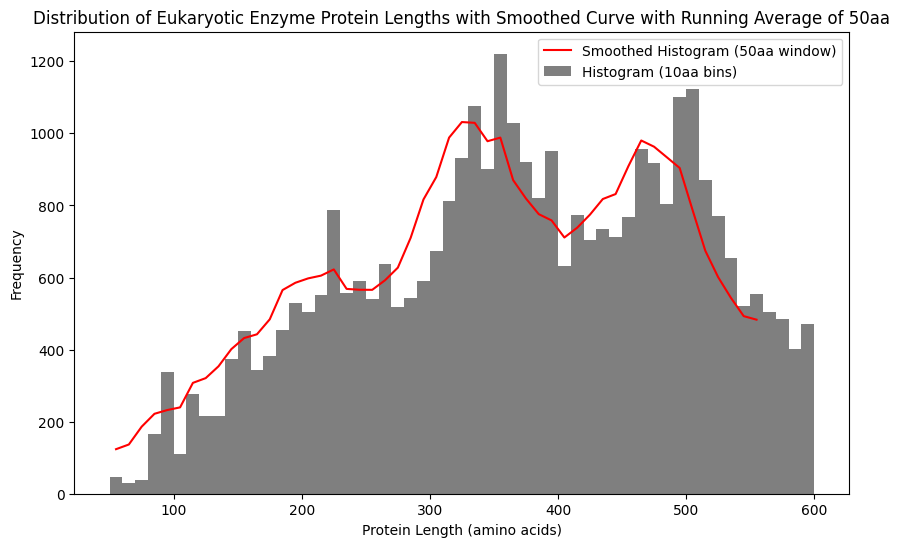

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_filtered['Lengths'] contains your data

# Define bin edges
bin_edges = np.arange(50, 601, 10)

# Create the histogram
hist, bins = np.histogram(df_filtered['Length'], bins=bin_edges)

# Smooth the histogram using a running average of 50 amino acids
smoothed_hist = np.convolve(hist, np.ones(5)/5, mode='valid') # np.ones value is 5 because there are 55 bins

# Calculate the midpoints of the bins
bin_midpoints = (bins[1:] + bins[:-1]) / 2
# Adjust bin_midpoints for smoothing
smoothed_bin_midpoints = bin_midpoints[:len(smoothed_hist)]

# Plot the smoothed histogram
plt.figure(figsize=(10, 6))
plt.plot(smoothed_bin_midpoints, smoothed_hist, color='red', label='Smoothed Histogram (50aa window)')
# Plot the original histogram
plt.bar(bin_midpoints, hist, width=10, align='center', color='black', alpha=0.5, label='Histogram (10aa bins)')
plt.xlabel('Protein Length (amino acids)')
plt.ylabel('Frequency')
plt.title('Distribution of Eukaryotic Enzyme Protein Lengths with Smoothed Curve with Running Average of 50aa')
plt.legend()
plt.show()

# From this plot, we see peaks in the protein lengths around 200, 340, and 480 amino acids. This suggests a periodicity of about 140 amino acids.

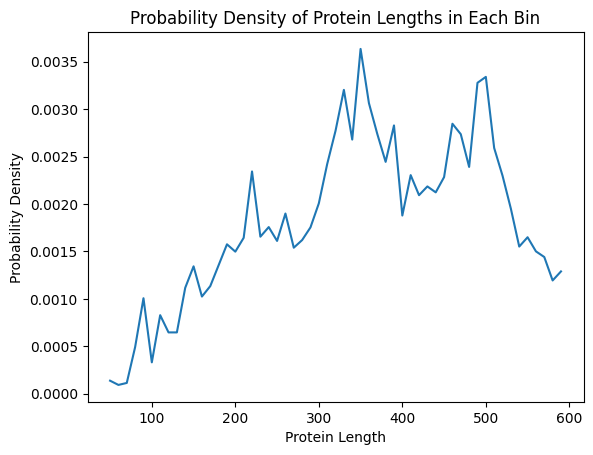

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Creating a plot for the probability density vs protein length of the data

# Define the number of bins and the range of protein lengths
num_bins = 55
min_length = min(df_filtered['Length'])
max_length = max(df_filtered['Length'])
bin_width = (max_length - min_length) / num_bins

# Initialize arrays to store counts and probabilities
bin_edges = np.linspace(min_length, max_length, num_bins + 1)
bin_counts = np.zeros(num_bins)
prob_density = np.zeros(num_bins)

# Count the number of data points in each bin
for length in df_filtered['Length']:
    for i in range(num_bins):
        if bin_edges[i] <= length < bin_edges[i+1]:
            bin_counts[i] += 1
            break

# Calculate the probability density for each bin
total_samples = len(df_filtered['Length'])
for i in range(num_bins):
    prob_density[i] = bin_counts[i] / total_samples / bin_width

# Plotting
plt.plot(bin_edges[:-1], prob_density)
plt.xlabel('Protein Length')
plt.ylabel('Probability Density')
plt.title('Probability Density of Protein Lengths in Each Bin')
plt.show()


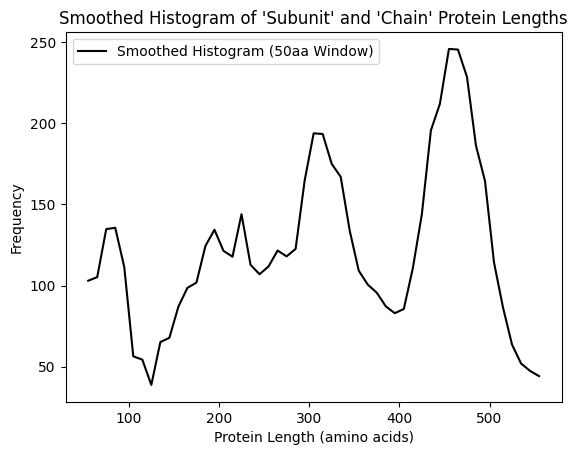

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a plot of only the smoothed histogram where we have filtered out only proteins that contain the words 'subunit' or 'chain'
  # in the description
  # This provides us a possible picture as to why there is a periodicity of enzyme lengths.
  # The ideal length of a protein that is a subunit or part of a chain may be around the peaks we see in our distribution.

# Filter the data based on 'Protein name' column
subunit_data = df_filtered[df_filtered['Protein names'].str.contains('subunit|chain', case=False)]

# Define bin edges
bin_edges = np.arange(50, 601, 10)

# Create the histogram
hist, bins = np.histogram(subunit_data['Length'], bins=bin_edges)

# Smooth the histogram using a running average of 50 amino acids
smoothed_hist = np.convolve(hist, np.ones(5)/5, mode='valid') # np.ones value is 5 because there are 55 bins

# Calculate the midpoints of the bins
bin_midpoints = (bins[1:] + bins[:-1]) / 2
# Adjust bin_midpoints for smoothing
smoothed_bin_midpoints = bin_midpoints[:len(smoothed_hist)]

# Plot the smoothed histogram
plt.plot(smoothed_bin_midpoints, smoothed_hist, color='black', label='Smoothed Histogram (50aa Window)')

plt.xlabel('Protein Length (amino acids)')
plt.ylabel('Frequency')
plt.title('Smoothed Histogram of \'Subunit\' and \'Chain\' Protein Lengths')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Smoothing data over an equally weighted window of 50 aa
smoothed_lengths = np.convolve(df_filtered['Length'], np.ones(50)/50, mode='valid')


In [ ]:
import numpy as np

def cosine_fourier_transform(smoothed_lengths, max_period = 200):
    """
    Creating a function to calculate the amplitude of the cosine Fourier Transform given
    eukaryotic enzyme data.

    This function takes in the values and the max value of the period and returns
    the amplitude values over that period for the data.
    """
    n = len(smoothed_lengths)
    cosine_transform = np.zeros(max_period, dtype=complex)

    for k in range(1, max_period+1):
      osc_term = sum(np.cos(2 * np.pi * i / k) for i in smoothed_lengths)
      denom = sum(np.cos(2*np.pi*i/k)**2 for i in smoothed_lengths)
      cosine_transform[k-1] = osc_term/denom if denom != 0 else 0

    return cosine_transform

# Result from this function is the amplitudes
smoothed_cosine_transform = cosine_fourier_transform(smoothed_lengths)

cosine_transform = cosine_fourier_transform(df_filtered['Length'])


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


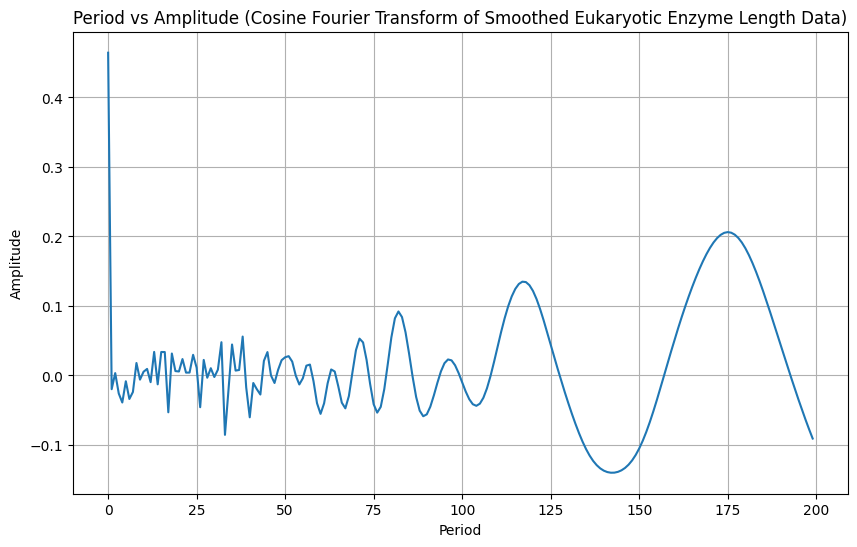

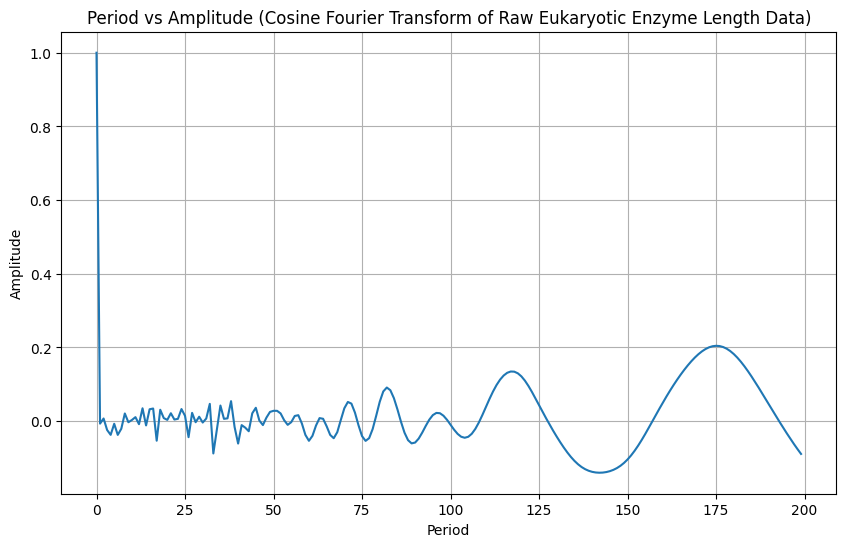

In [ ]:
# Plot the Cosine Fourier Transform of Smoothed Data
plt.figure(figsize=(10, 6))
plt.plot(smoothed_cosine_transform, label='Cosine Fourier Transform')
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.title('Period vs Amplitude (Cosine Fourier Transform of Smoothed Eukaryotic Enzyme Length Data)')
plt.grid(True)
plt.show()

# Plot the Cosine Fourier Transform of Raw Length Data
plt.figure(figsize=(10, 6))
plt.plot(cosine_transform, label='Cosine Fourier Transform')
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.title('Period vs Amplitude (Cosine Fourier Transform of Raw Eukaryotic Enzyme Length Data)')
plt.grid(True)
plt.show()